## Multiplane PSFs to splines

In this example we'll create cubic splines from measured PSFS. This example requires that the `multiplane_measure_psf` notebook was previously run in the same directory as it uses the results from that notebook.

### Configuration

In [27]:
import os
root=r"F:\moritz\babcock_test\biplane_500nm"
script_root = r'E:\GitHub\storm-analysis\storm_analysis'
os.chdir(root)
print(os.getcwd())

if not os.path.exists("c1_psf.psf"):
    print("Please run the multiplane_measure_psf notebook first")

F:\moritz\babcock_test\biplane_500nm


Create the multiplane analysis XML file that we'll need at the plane weighting step.

In [28]:
import storm_analysis.jupyter_examples.multiplane_psfs_to_splines as multiplane_psfs_to_splines

multiplane_psfs_to_splines.multiplaneXML()

### PSF normalization

The first step is to normalize the PSFs relative to each other. 

The idea is that the relative PSF heights as a function of Z provides information about the localizations Z position. In order for this to work correctly we need the PSFs to be normalized.

In [29]:
import storm_analysis.multi_plane.normalize_psfs as normalizePSFs

normalizePSFs.normalizePSFs(["c1_psf.psf", "c2_psf.psf"])

c1_psf_normed.psf 1.0
c2_psf_normed.psf 0.9999607430423311


### Check Z offset

Make a plot of the PSFs heights versus Z for the purpose of visually checking that the z offset values are relatively well centered. If this turns out not to be the case then the z values "z_offset.txt" should be adjusted such that the PSFs are better centered.

Ideally, at least for standard biplane imaging, the maximum values of the two PSFs should be approximately symmetric around Z = 0.

Plane: 0 maximum at 250.0nm
Plane: 1 maximum at -250.0nm


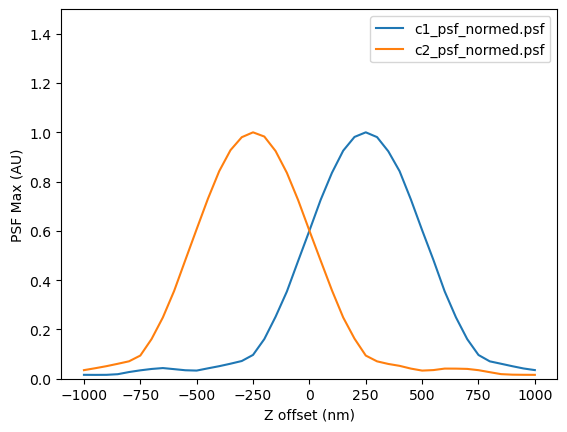

In [30]:
import storm_analysis.multi_plane.check_plane_offsets as checkPlaneOffsets

checkPlaneOffsets.checkPlaneOffsets(["c1_psf_normed.psf", "c2_psf_normed.psf"])


### Use normalized measured PSFs to create cubic splines

In [31]:
import storm_analysis.spliner.psf_to_spline as psfToSpline

# 10 is 1/2 the spline size in pixels. This is reasonable value for setups with a camera pixel size of 100nm.
psfToSpline.psfToSpline("c1_psf_normed.psf", "c1_psf.spline", 10)
psfToSpline.psfToSpline("c2_psf_normed.psf", "c2_psf.spline", 10)


Generating 3D spline.
Generating XY splines.
Generating fitting spline.
Calculating spline coefficients.
Calculating spline values.
  0 of 19
  1 of 19
  2 of 19
  3 of 19
  4 of 19
  5 of 19
  6 of 19
  7 of 19
  8 of 19
  9 of 19
  10 of 19
  11 of 19
  12 of 19
  13 of 19
  14 of 19
  15 of 19
  16 of 19
  17 of 19
  18 of 19
  19 of 19
  cx 0.00 19
  cx 0.33 19
  cx 0.67 19
  cx 1.00 19
  cx 1.33 19
  cx 1.67 19
  cx 2.00 19
  cx 2.33 19
  cx 2.67 19
  cx 3.00 19
  cx 3.33 19
  cx 3.67 19
  cx 4.00 19
  cx 4.33 19
  cx 4.67 19
  cx 5.00 19
  cx 5.33 19
  cx 5.67 19
  cx 6.00 19
  cx 6.33 19
  cx 6.67 19
  cx 7.00 19
  cx 7.33 19
  cx 7.67 19
  cx 8.00 19
  cx 8.33 19
  cx 8.67 19
  cx 9.00 19
  cx 9.33 19
  cx 9.67 19
  cx 10.00 19
  cx 10.33 19
  cx 10.67 19
  cx 11.00 19
  cx 11.33 19
  cx 11.67 19
  cx 12.00 19
  cx 12.33 19
  cx 12.67 19
  cx 13.00 19
  cx 13.33 19
  cx 13.67 19
  cx 14.00 19
  cx 14.33 19
  cx 14.67 19
  cx 15.00 19
  cx 15.33 19
  cx 15.67 19
  cx 16.00 19
  

You can check the splines with a tool like ImageJ. Tiff versions of the splines are also created, "c1_psf_sp.tif" and "c2_psf_sp.tif" in this example.

### Creating the weights file

Multiplane uses channel “information” weights in order to more optimally weight the contribution from each plane in the determination of a localizations parameters. The channels are weighted based on their Cramer-Rao bounds as a function of z.

For this step you will need a reasonable estimate of the average background and intensity in the data you plan to analyze. The background is photo-electrons per plane. The signal is the expected average number of photo-electrons per localization summed over all the planes. If your camera does not have a gain of 1.0 you will need to convert camera counts to photo-electrons.

Ideally the analysis would update the Cramer-Rao bounds for each localization as the estimates for the background and intensity change. However as the Cramer-Rao calculation is somewhat computational expensive we forego this step and instead just use average values.

Calculating Cramer-Rao bounds.
z -1000.0
z -894.7
z -789.5
z -684.2
z -578.9
z -473.7
z -368.4
z -263.2
z -157.9
z -52.6
z 52.6
z 157.9
z 263.2
z 368.4
z 473.7
z 578.9
z 684.2
z 789.5
z 894.7
z 1000.0
Correcting for mapping.


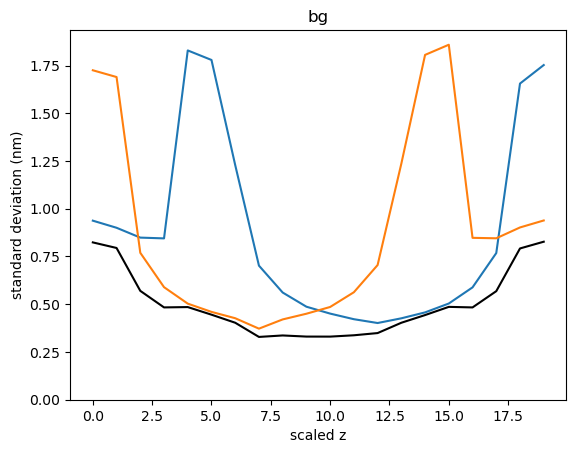

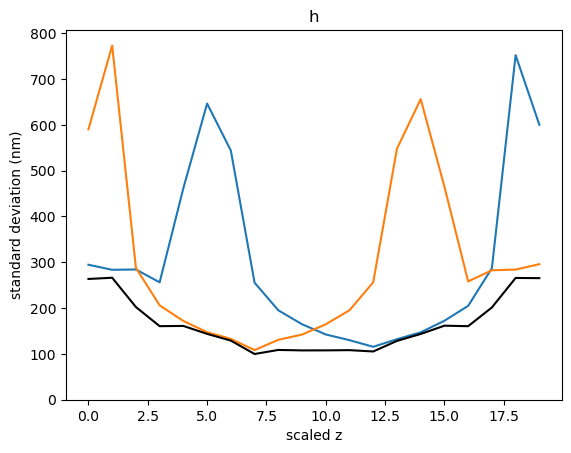

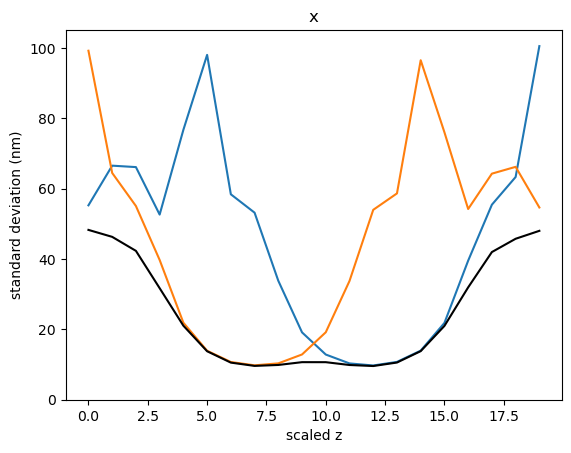

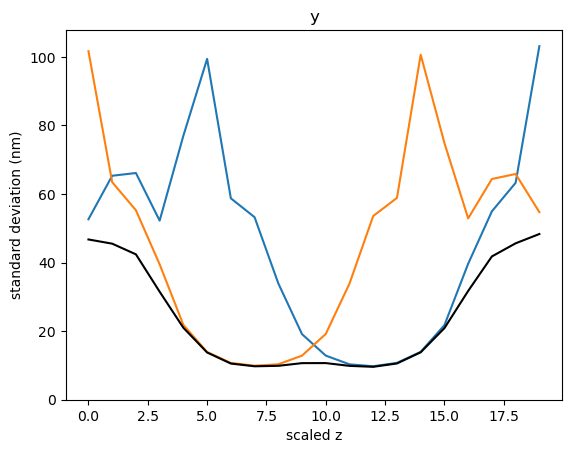

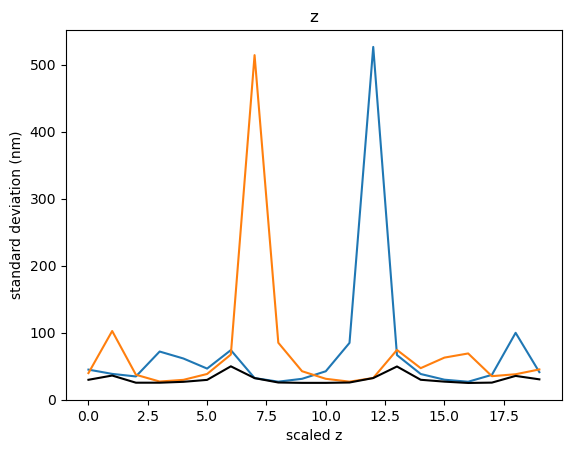

In [32]:
import storm_analysis.multi_plane.plane_weighting as planeWeighting

planeWeighting.runPlaneWeighting("multiplane.xml", 
                                 "weights.npy",
                                 [20, 20],   # 20 photons average background in each plane
                                 2000,       # 2000 photon average PSF sum.
                                 no_plots = False)


In the above plots the colored lines are the Cramer-Rao bounds for each individual PSF and the black line is the Cramer-Rao bound for all of the PSFs together.